In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100, 1)
y = 4 + 3*X + np.random.randn(100, 1)

In [5]:
import matplotlib.pyplot as plt

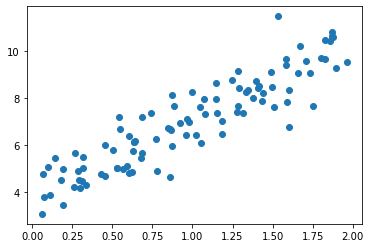

In [9]:
plt.scatter(X, y)

In [10]:
X_b = np.c_[np.ones((100, 1)), X]
X, X_b

(array([[0.11284635],
        [0.64289343],
        [0.31619414],
        [0.26257793],
        [1.60557384],
        [1.15597433],
        [1.05174034],
        [0.1893729 ],
        [1.82682019],
        [0.19315879],
        [0.30074475],
        [1.59191848],
        [1.41450966],
        [0.73860618],
        [0.28581132],
        [1.9616834 ],
        [0.26854662],
        [1.33731693],
        [1.49777551],
        [1.2859083 ],
        [0.53155715],
        [0.68441872],
        [1.31593653],
        [1.43423449],
        [1.28488658],
        [0.87017185],
        [1.27554222],
        [1.5118879 ],
        [0.8617949 ],
        [1.82745014],
        [1.86966005],
        [0.88555827],
        [0.31054602],
        [0.63475805],
        [1.75244013],
        [0.33825716],
        [0.77104875],
        [1.07300038],
        [0.1434913 ],
        [0.97941311],
        [0.2938671 ],
        [1.73269165],
        [0.56412569],
        [1.08109047],
        [1.14773867],
        [0

In [11]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [12]:
theta_best

array([[3.8255162 ],
       [3.24011233]])

In [13]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new, X_new_b

(array([[0],
        [2]]),
 array([[1., 0.],
        [1., 2.]]))

In [14]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.8255162 ],
       [10.30574086]])

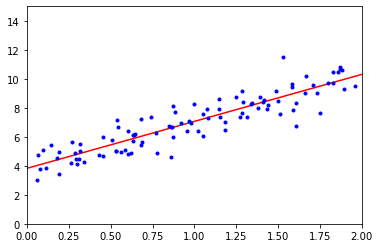

In [15]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.8255162]), array([[3.24011233]]))

In [18]:
lin_reg.predict(X_new)

array([[ 3.8255162 ],
       [10.30574086]])

In [19]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.8255162 ],
       [3.24011233]])

In [20]:
np.linalg.pinv(X_b).dot(y)

array([[3.8255162 ],
       [3.24011233]])

In [21]:
eta = 0.1
n_iterations = 1000
m = 100

In [23]:
theta = np.random.randn(2, 1)

In [24]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [25]:
theta

array([[3.8255162 ],
       [3.24011233]])

In [27]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

In [28]:
theta = np.random.randn(2, 1)
theta

array([[0.63614197],
       [0.44438463]])

In [29]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m + i)
        theta -= eta*gradients

In [30]:
theta

array([[3.83828144],
       [3.2457048 ]])

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [33]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.83075568]), array([3.24428966]))

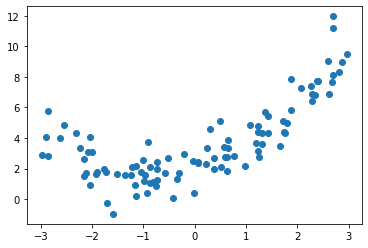

In [34]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X, X_poly

(array([[-0.72707368],
        [ 1.80514857],
        [ 2.06495103],
        [-0.93048226],
        [-2.03619278],
        [ 2.69199213],
        [ 1.24071164],
        [-2.1543329 ],
        [ 1.23223626],
        [-0.72634834],
        [ 2.29630184],
        [-0.04032002],
        [ 2.70536611],
        [ 2.70419147],
        [-1.14554406],
        [ 1.42838283],
        [ 1.20096058],
        [ 1.71687496],
        [ 2.29718472],
        [-0.82146218],
        [ 1.73756351],
        [-1.50593419],
        [-1.25079075],
        [-0.298542  ],
        [-2.12485427],
        [-1.04004343],
        [ 1.31214377],
        [-2.97432328],
        [ 1.22928798],
        [-1.58647678],
        [ 2.62243574],
        [ 1.24468937],
        [-2.55226468],
        [ 0.05933439],
        [ 2.27129281],
        [-2.03385984],
        [ 0.64224594],
        [-0.57908591],
        [-0.02223133],
        [ 0.63221438],
        [-0.97306842],
        [-2.07905744],
        [ 1.75227853],
        [-1

In [36]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.01074329]), array([[0.98039704, 0.56608595]]))

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 3])
    plt.show()

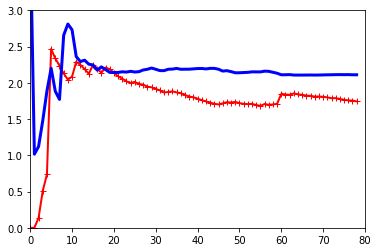

In [46]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [41]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

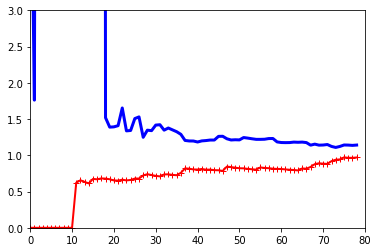

In [47]:
plot_learning_curves(polynomial_regression, X, y)

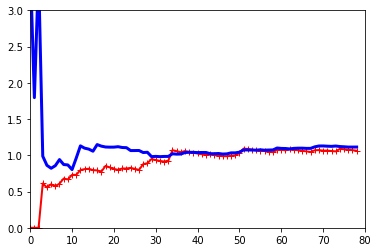

In [48]:
polynomial_regression_2 = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression_2, X, y)

In [49]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.18030712]])

In [50]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15820435])

In [52]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.13416374])

In [53]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.15721243])

In [56]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.13334063])

In [62]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [63]:
best_epoch, best_model

(968,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              tol=-inf, warm_start=True))

In [64]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [65]:
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [66]:
X, y

(array([[0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.1],
        [0.1],
        [0.2],
        [0.4],
        [0.4],
        [0.3],
        [0.3],
        [0.3],
        [0.2],
        [0.4],
        [0.2],
        [0.5],
        [0.2],
        [0.2],
        [0.4],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.4],
        [0.1],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [0.1],
        [0.2],
        [0.2],
        [0.3],
        [0.3],
        [0.2],
        [0.6],
        [0.4],
        [0.3],
        [0.2],
        [0.2],
        [0.2],
        [0.2],
        [1.4],
        [1.5],
        [1.5],
        [1.3],
        [1.5],
        [1.3],
        [1.6],
        [1. ],
        [1.3],
        [1.4],
        [1. ],
        [1.5],
        [1. ],
        [1.4],
        [1.3],
        [1.4],
        [1

In [67]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

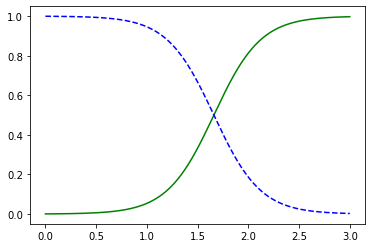

In [68]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')

In [70]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [71]:
X = iris['data'][:, (2, 3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)
softmax_reg.predict([[5, 2]]), softmax_reg.predict_proba([[5, 2]])

(array([2]), array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]]))